# Griddap

Erddapy can access gridded datasets, using the server-side subsetting of griddap
to download only the parts of a dataset that the user requires


In [1]:
from erddapy import ERDDAP

When accessing gridded datasets, the kwarg `protocol='griddap'` must be used


In [2]:
e = ERDDAP(
    server="CSWC",  # CoastWatch West Coast Node
    protocol="griddap",
)
e.dataset_id = (
    "jplAvisoSshMon"  #  AVISO Model Output, obs4MIPs NASA-JPL, Global, 1 Degree
)

Information on the griddap dataset is fetched with `griddap_initialize`. This
fills the `variables` and `constraints` properties for that dataset


In [3]:
e.griddap_initialize()

import json

print(f"variables in this dataset:\n\n{e.variables}")
print(
    f"\nconstraints of this dataset:\n\n{json.dumps(e.constraints, indent=1)}"
)

variables in this dataset:

['sshag', 'nObs', 'stdErr']

constraints of this dataset:

{
 "time>=": "2010-12-16T12:00:00Z",
 "time<=": "2010-12-16T12:00:00Z",
 "time_step": 1,
 "latitude>=": -89.5,
 "latitude<=": 89.5,
 "latitude_step": 1,
 "longitude>=": 0.5,
 "longitude<=": 359.5,
 "longitude_step": 1
}


The default behaviour is to use erddap standard subsetting: return all variables
at the most recent timestep and every point of the remaining dimensions.

This can result in large datasets, the values of the constraints can be changed,
and variables dropped before data set is downloaded


In [4]:
e.variables = e.variables[:2]
print(f"variables for download:\n\n{e.variables}")

variables for download:

['sshag', 'nObs']


In [5]:
e.constraints["latitude_step"] = 1
e.constraints["longitude_step"] = 1

print(f"\nconstraints for download:\n\n{json.dumps(e.constraints, indent=1)}")


constraints for download:

{
 "time>=": "2010-12-16T12:00:00Z",
 "time<=": "2010-12-16T12:00:00Z",
 "time_step": 1,
 "latitude>=": -89.5,
 "latitude<=": 89.5,
 "latitude_step": 1,
 "longitude>=": 0.5,
 "longitude<=": 359.5,
 "longitude_step": 1
}


Once the query is prepared, data can be downloaded to xarray DataSet, pandas
DataFrame and more


In [6]:
ds = e.to_xarray()

Once downloaded, data can be quickly visualised with xarray's inbuilt plotting
functionality


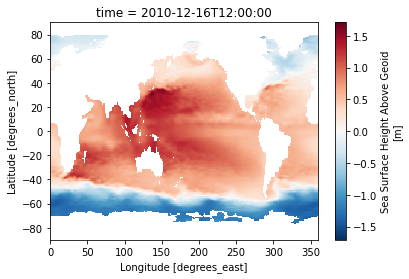

In [7]:
ds["sshag"].plot()

### Skip subsetting

ERDDAP server-side subsetting can be avoided by specifying the opendap protocol.
This is a good choice if you intend to use a full dataset or take several slices
from the same dataset


In [8]:
e = ERDDAP(
    server="CSWC",  # CoastWatch West Coast Node
    protocol="griddap",
    response="opendap",
)
e.dataset_id = "jplAquariusSSS3MonthV5"  # Aquarius Sea Surface Salinity, L3 SMI, Version 5, 1.0°, Global,

The data can be downloaded immediately, no need to run `griddap_initialize`


In [9]:
ds = e.to_xarray()

In [10]:
ds

<xarray.Dataset>
Dimensions:    (time: 16, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 2011-06-21 2011-09-21 ... 2015-03-21
  * latitude   (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    sss        (time, latitude, longitude) float32 ...
Attributes: (12/55)
    _lastModified:                     2017-10-22T01:47:49.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_type:                      group
    ...                                ...
    summary:                           This dataset has 3-month composites of...
    temporal_range:                    SNAU
    time_coverage_end:                 2015-03-21T00:00:00Z
    time_coverage_start:               2011-06-21T00:00:00Z
    title:                             Aquarius Sea Surface Salinity, L3 SMI,...
    Westernmost_Easting:               -179.5